<a href="https://colab.research.google.com/github/RushikeshBhabad/MachineLearning/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

**Linear Regression**

In [ ]:
class Linear_Regression:
  # initiating the parameters (learning rate & no of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):   # X_Train & Y_Train

    # number of training examples & number of features

    self.m,self.n = X.shape # number of rows & columns

    # initiating weight an bias

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    for i in range (self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate Gradients

    dw = - (2* (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    # updating the weights

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

**Using Linear Regression for Prediction**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data** **PreProcesing**

In [ ]:
# loading data from csv file to pandas dataFrame

salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
# printing first 5 columns of datasets
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# number of rows & colums in the dataframe
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


**Spliting the feature and Target**

In [ ]:
X = salary_data.iloc[:,:-1].values  # imagine this as [1:10:1] 2nd column will be removed
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Spliting the data into training data and test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=2)

**Training the linear Regression Model**

In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=10000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# printing the parameter values ( Weights & Bias )

print('Weight = ', model.w)
print('Bias = ', model.b)

Weight =  [9512.94498763]
Bias =  23707.81324657524


In [ ]:
# our model will be like
# y = 9154(x) + 23697
# we can give any input value x and we will get o/p with respect to that

In [ ]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


Visualizing the predicted values & actual values

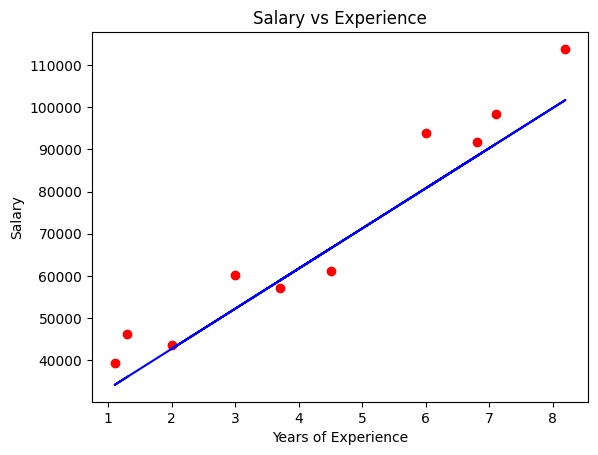

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()